In [1]:
import numpy as np
import pandas as pd
# Entorno Scikit Learn
from sklearn.neighbors import KNeighborsRegressor   # Algoritmo
from sklearn.metrics import mean_squared_error, mean_absolute_error      # Metrica de desempeño ( para ver que tan bien se ajusta nuestro modelo a los datos)
from sklearn.model_selection import train_test_split    # Para dividir el conjunto de prueba y entrenamiento
from sklearn.model_selection import KFold, RepeatedKFold, cross_val_score   # Validación cruzada 
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# datos
data=pd.read_csv("https://raw.githubusercontent.com/Albertuff/Machine-Learning/master/datos/data_evaluation.csv")
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
print(data.shape)
print(len(data))

(11914, 16)
11914


In [4]:
# Vamos a poner orden en los nombres de los atributos y en las respuestas de los atributos
# Eliminamos las altas-bajas y concatenamos con _
data.columns=data.columns.str.lower().str.replace(" ","_")
data.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [5]:
# Tipo de datos y cantidad de datos no-nulos
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               11914 non-null  object 
 1   model              11914 non-null  object 
 2   year               11914 non-null  int64  
 3   engine_fuel_type   11911 non-null  object 
 4   engine_hp          11845 non-null  float64
 5   engine_cylinders   11884 non-null  float64
 6   transmission_type  11914 non-null  object 
 7   driven_wheels      11914 non-null  object 
 8   number_of_doors    11908 non-null  float64
 9   market_category    8172 non-null   object 
 10  vehicle_size       11914 non-null  object 
 11  vehicle_style      11914 non-null  object 
 12  highway_mpg        11914 non-null  int64  
 13  city_mpg           11914 non-null  int64  
 14  popularity         11914 non-null  int64  
 15  msrp               11914 non-null  int64  
dtypes: float64(3), int64(5

In [6]:
# Cantidad de datos faltantes por atributos
data.isna().sum()
# Si hay datos faltantes en el target se deben eliminar, ya que no puedo predecir algo que no conozco 

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

In [7]:
# Homogeneizamos las respuestas 
columnas_object=list(data.dtypes[data.dtypes=="object"].index)
print(columnas_object)

for cols in columnas_object:
    data[cols]=data[cols].str.lower().str.replace(" ","_")
data.head()

['make', 'model', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']


,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


<AxesSubplot:xlabel='msrp', ylabel='Count'>

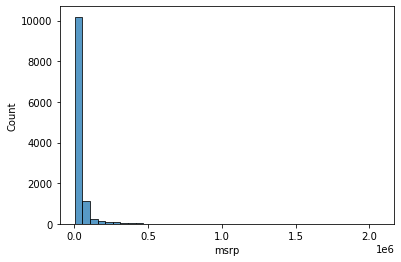

In [8]:
# Como es la variable que queremos predecir?
sns.histplot(data.msrp, bins=40)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

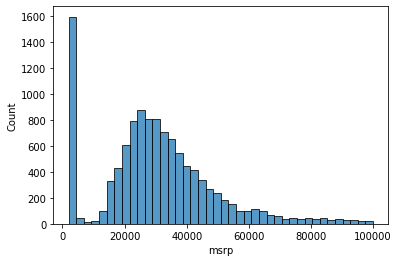

In [9]:
sns.histplot(data.msrp[data.msrp<100000], bins=40,)

<AxesSubplot:xlabel='msrp', ylabel='Count'>

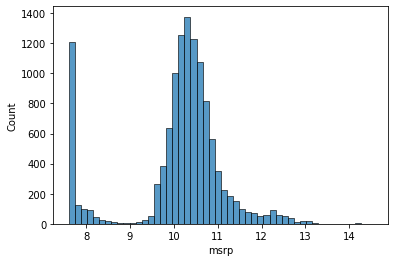

In [10]:
log_price=np.log(data.msrp) # lLa transformacion logaritmica solo se hace el el target. Ayuda a estandarizar la variable de respuesta cuando elimina las unidades 
sns.histplot(log_price,bins=50)

In [11]:
# COmo defino otras variables a partir de las que ya tengo 
# Definimos la antiguedad del vehiculo
data["antiguedad"]=2017-data["year"]
data.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp,antiguedad
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135,6
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650,6
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350,6
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450,6
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500,6


In [12]:
# Datos faltantes
data.isna().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
antiguedad              0
dtype: int64

In [13]:
# Vamos a seleccionar algunos atributos
X=data[["antiguedad","engine_hp","engine_cylinders","number_of_doors","highway_mpg","city_mpg","popularity"]]
Y=log_price # Logaritmo del precio

In [14]:
X.isna().sum()

antiguedad           0
engine_hp           69
engine_cylinders    30
number_of_doors      6
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

# Para completar los datos faltantes:

## Estrategia 1 - Reemplazar los datos faltantes con 0

In [15]:
X1=X.fillna(0).copy()
print(X1.isna().sum())

antiguedad          0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64


## Estrategia 2 - Reemplazar los datos faltantes por una constante, promedio o la moda

In [16]:
from sklearn.impute import SimpleImputer

# Si utilizamos la estregia de constante, los datos se reemplazan por una constante
# Iniciamos la funcion
estrategia=SimpleImputer(strategy="constant",fill_value=0)
X2=pd.DataFrame(estrategia.fit_transform(X).copy(),columns=X.columns)       # Ahora X2 es una matriz y no un dataframe
X2.isna().sum()

antiguedad          0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

In [17]:
# Si utilizamos la estregia de constante, los datos se reemplazan por el valor mas frecuente
# Iniciamos la funcion
estrategia=SimpleImputer(strategy="most_frequent")
X3=pd.DataFrame(estrategia.fit_transform(X).copy(),columns=X.columns)       # Ahora X3 es una matriz y no un dataframe
X3.isna().sum()

antiguedad          0
engine_hp           0
engine_cylinders    0
number_of_doors     0
highway_mpg         0
city_mpg            0
popularity          0
dtype: int64

# Clase 13 - Continuacion

Tomamos el dataframe que ya no tienen datos faltantes, ahora lo siguiente es construir un modelo para los datos. Sin embargo no seria correcto 
proceder a la prueba y entrenamiento partiendo de este dataframe "completado". Porque los conjuntos de entrenamiento y prueba no serían independientes, pues de 
alguna manera ocupamos el conjunto de prueba para entrenar el modelo y esto no se debe hacer. La solución es utilizar un Pipeline para definir todo el procesamiento.

In [18]:
# Para construir el modelo partimos de los datos originales donde tengo datos faltantes.
X=data[["antiguedad","engine_hp","engine_cylinders","number_of_doors","highway_mpg","city_mpg","popularity"]]
# Y=log_price # Logaritmo del precio
Y=data["msrp"]

# Ahora incluimos una variable categorica: el tamaño del vehiculo la cual tiene 3 categorias las cuales convertiremos a dummies (binarias)
data_var_categorica=pd.get_dummies(data["vehicle_size"])
data_var_categorica

X=pd.concat([X,data_var_categorica],axis=1)

# Tambien es util guardar los nombres de los atributos
nombres=X.columns
X

,antiguedad,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,compact,large,midsize
0,6,335.0,6.0,2.0,26,19,3916,1,0,0
1,6,300.0,6.0,2.0,28,19,3916,1,0,0
2,6,300.0,6.0,2.0,28,20,3916,1,0,0
3,6,230.0,6.0,2.0,28,18,3916,1,0,0
4,6,230.0,6.0,2.0,28,18,3916,1,0,0
...,...,...,...,...,...,...,...,...,...,...
11909,5,300.0,6.0,4.0,23,16,204,0,0,1
11910,5,300.0,6.0,4.0,23,16,204,0,0,1
11911,5,300.0,6.0,4.0,23,16,204,0,0,1
11912,4,300.0,6.0,4.0,23,16,204,0,0,1


In [19]:
# Vamos a definir un Pipeline que es la secuencia de pasos que tenemos que hacer para construir el modelo. Pasos:
# 1.- Dvidir al conjunto de datos original en entrenamiento y prueba (esto lo hace la cv)
# 2.- Completar los datos faltantes en el conjunto de entrenamiento, de acuerdo a una estrategia 
# 3.- Entrenar al modelo con los datos de entrenamiento ya completos
# 4.- Para hacer las predicciones utilizamos el conjunto de prueba, sin embargo en el conjunto de prueba puede ser que haya datos faltantes, ¿Como los completamos?
#     Respuesta: Con la estrategia que aprendio con el conjunto de datos de entrenamiento

pipe=Pipeline([("impute",SimpleImputer(strategy="most_frequent")),("escala",preprocessing.MinMaxScaler()), ("Knn",KNeighborsRegressor())])

# Calibramos el modelo de knn
parametros={"Knn__n_neighbors":np.arange(1,50)}     #primero se define el alias del modelo(definido en el pipe) seguido por dos guines bajos y el nombre del hiperparametro

# Definimos la rejilla
rejilla=GridSearchCV(pipe,param_grid=parametros,cv=10,scoring="neg_mean_absolute_error",n_jobs=-1)
rejilla.fit(X,Y)
print(f" El mejor modelo es con k={rejilla.best_params_}")
print(f" El error absoluto promedio observado con el mejor modelo es: {-rejilla.best_score_}")

 El mejor modelo es con k={'Knn__n_neighbors': 17}
 El error absoluto promedio observado con el mejor modelo es: 10974.995458926222


In [20]:
# Ya tenemos el mejor modelo (k=8) y además ya tenemos una calificación del desempeño predictivo del modelo (EAP= 10909.51621440551)
# Si además reescalamos los datos en [0,1], entonces el mejor modelo es con k=21 y un EAP=10385.333343557022
# Si además agregamos el tamaño del vehiculo, entonces el mejor modelo es con k=17 y un EAP=10974.995458926222

# Vamos a entrenar al modelo final y a hacer predicciones
# 1.- Entrenar el modelo final utilizando ¡¡¡TODOS LOS DATOS!!!, pero X y Y tienen datos faltantes. Vamos aguiarnos por el pipe (se usa la misma estrategia que uso el pipe)
#       Definimos una estrategia para completar los datos faltantes
impute=SimpleImputer(strategy="most_frequent") 

# 2.- Aprenda la estrategia en el conjunto de datos original
impute.fit(X)

# 3.- Completamos los datos faltantes
X=impute.transform(X)   # X ya no tiene datos faltantes, pero no es un dataframe, ahora es un arreglo bidimensional
X=pd.DataFrame(X,columns=nombres)

# Ahora el reescalamiento 
# 3.1.- Definimos la estrategia de reescalamiento
escala=preprocessing.MinMaxScaler()
# 3.2.- Aprender la estrategia en el conjunto de datos completos
escala.fit(X)
# 3.3.- Transformar los datos 
X=escala.transform(X)   # los datos ya están en la escala [0.1], pero no es un dataframe
X=pd.DataFrame(X,columns=nombres)

# 4.- Definimos cual es el modelo final
modelo_final=KNeighborsRegressor(n_neighbors=17)

# 5.- Entrenamos el modelo final con todos los datos
modelo_final.fit(X,Y)
 

KNeighborsRegressor(n_neighbors=17)

In [21]:
# Vamos a hacer las predicciones empleando datos que ingresa el usuario a travez de un dataframe

datos_nuevos=pd.DataFrame()
datos_nuevos["antiguedad"]=[8,10,6]
datos_nuevos["engine_hp"]=[320,240,300]
datos_nuevos["engine_cylinders"]=[8," ",6]
datos_nuevos["number_of_doors"]=[2,4,3]
datos_nuevos["highway_mpg"]=[18,28,24]
datos_nuevos["city_mpg"]=[" ",28,30]
datos_nuevos["popularity"]=[3500,3520,2500]
datos_nuevos["vehicle_size"]=["compact","midsize","large"]
datos_nuevos

# Si los datos vienen en un excel los leemos y seleccionamos las variables a utilizar

,antiguedad,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,vehicle_size
0,8,320,8,2,18,,3500,compact
1,10,240,,4,28,28,3520,midsize
2,6,300,6,3,24,30,2500,large


In [22]:
datos_nuevos.info()     # Observamos que los tipos de datos no son compatibles

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   antiguedad        3 non-null      int64 
 1   engine_hp         3 non-null      int64 
 2   engine_cylinders  3 non-null      object
 3   number_of_doors   3 non-null      int64 
 4   highway_mpg       3 non-null      int64 
 5   city_mpg          3 non-null      object
 6   popularity        3 non-null      int64 
 7   vehicle_size      3 non-null      object
dtypes: int64(5), object(3)
memory usage: 320.0+ bytes


In [23]:
# Forzamos a que los tipos de datos sean compatibles
datos_nuevos.engine_cylinders=pd.to_numeric(datos_nuevos.engine_cylinders,errors="coerce")
datos_nuevos.city_mpg=pd.to_numeric(datos_nuevos.city_mpg,errors="coerce")

In [24]:
datos_nuevos

,antiguedad,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,vehicle_size
0,8,320,8.0,2,18,NaN,3500,compact
1,10,240,NaN,4,28,28.0,3520,midsize
2,6,300,6.0,3,24,30.0,2500,large


In [25]:
# Si reescalamos, tenemos que crear primero las dummies, ya que no puede reescalar un string. Tenemos que crear las dummies para la variable "vehicle_size"
datos_nuevos_dummies=pd.get_dummies(datos_nuevos["vehicle_size"])
datos_nuevos=pd.concat([datos_nuevos,datos_nuevos_dummies],axis=1)
# Ahora eliminamos la variable "vehicle_size" ya que se mantiene en el dataframe y no se va poder reescalar
datos_nuevos.pop("vehicle_size")
datos_nuevos

# Ya tenemos los datos compatibles, aunque hay datos faltantes. Pero ya el algoritmo está entrenado
datos_nuevos_completos=impute.transform(datos_nuevos) #utilizo los datos aprendidos al entrenar el modelo 
datos_nuevos_completos=pd.DataFrame(datos_nuevos_completos,columns=nombres)
datos_nuevos_completos      # Ya no tiene datos faltantes

# Aún falta reescalar...
datos_nuevos_escalados=escala.transform(datos_nuevos_completos) #utilizo los datos aprendidos al entrenar el modelo 
datos_nuevos_escalados=pd.DataFrame(datos_nuevos_escalados,columns=nombres)
datos_nuevos_escalados      # Ya no tiene datos faltantes y se encuentran en la escala [0,1]



,antiguedad,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,compact,large,midsize
0,0.296296,0.280127,0.500,0.0,0.017544,0.076923,0.618568,1.0,0.0,0.0
1,0.370370,0.195560,0.250,1.0,0.046784,0.161538,0.622104,0.0,0.0,1.0
2,0.222222,0.258985,0.375,0.5,0.035088,0.176923,0.441733,0.0,1.0,0.0


In [26]:
# Ahora si hacemos las predicciones
precios=modelo_final.predict(datos_nuevos_escalados)
datos_nuevos["rsmp"]=precios
datos_nuevos

,antiguedad,engine_hp,engine_cylinders,number_of_doors,highway_mpg,city_mpg,popularity,compact,large,midsize,rsmp
0,8,320,8.0,2,18,NaN,3500,1,0,0,45549.117647
1,10,240,NaN,4,28,28.0,3520,0,0,1,39270.588235
2,6,300,6.0,3,24,30.0,2500,0,1,0,27812.647059
